# Data exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Load data
bpp_original = pd.read_csv("https://osf.io/yhbr5/download", encoding="latin-1")

In [3]:
bpp_original.head()

,COUNTRY,retailer,retailer_s,date,day,month,year,id,price,price_online,...,DEVICEID,TIME,ZIPCODE,PHOTO,OTHERSKUITEM,COMMENTS,PRICETYPE,CODE,sale_online,country_s
0,ARGENTINA,1,ARGENTINA_1,2015-03-19,19.0,3.0,2015.0,201209030113,429.0,429.0,...,891df49fb1b12aa0,21:03,8300,20150319_210351.jpg,NaN,NaN,NaN,124816.0,NaN,Argentina
1,ARGENTINA,1,ARGENTINA_1,2015-03-19,19.0,3.0,2015.0,4710268235965,189.0,189.0,...,891df49fb1b12aa0,21:26,8300,20150319_212653.jpg,NaN,NaN,NaN,124816.0,NaN,Argentina
2,ARGENTINA,1,ARGENTINA_1,2015-03-19,19.0,3.0,2015.0,4905524916874,6999.0,6999.0,...,891df49fb1b12aa0,21:19,8300,20150319_211929.jpg,NaN,NaN,NaN,124816.0,NaN,Argentina
3,ARGENTINA,1,ARGENTINA_1,2015-03-19,19.0,3.0,2015.0,4905524925784,1999.0,2099.0,...,891df49fb1b12aa0,21:08,8300,20150319_210847.jpg,NaN,NaN,NaN,124816.0,NaN,Argentina
4,ARGENTINA,1,ARGENTINA_1,2015-03-19,19.0,3.0,2015.0,4905524931310,2899.0,2899.0,...,891df49fb1b12aa0,21:06,8300,20150319_210627.jpg,NaN,NaN,NaN,124816.0,NaN,Argentina


In [4]:
# Create variable equal to price offline vs price online
bpp_original["p_diff"] = bpp_original["price_online"] - bpp_original["price"]

### Descriptive statistics

In [5]:
bpp_original.describe()

,retailer,day,month,year,price,price_online,imputed,CODE,sale_online,p_diff
count,45253.000000,44928.000000,44928.000000,44928.000000,4.525300e+04,45253.000000,22414.0,42233.000000,4144.0,4.525300e+04
mean,34.087751,15.743523,5.301126,2015.079817,1.737368e+04,353.416684,1.0,181441.070253,1.0,-1.702027e+04
std,19.149542,8.440930,3.440339,1.035976,2.671665e+06,5269.492998,0.0,158106.823327,0.0,2.671661e+06
min,1.000000,1.000000,1.000000,2000.000000,0.000000e+00,0.030000,1.0,112190.000000,1.0,-5.534910e+08
25%,16.000000,9.000000,3.000000,2015.000000,7.000000e+00,6.990000,1.0,124816.000000,1.0,0.000000e+00
50%,37.000000,16.000000,5.000000,2015.000000,1.999000e+01,19.990000,1.0,124816.000000,1.0,0.000000e+00
75%,50.000000,23.000000,8.000000,2015.000000,5.799000e+01,56.990000,1.0,124816.000000,1.0,0.000000e+00
max,62.000000,31.000000,12.000000,2016.000000,5.534910e+08,261690.000000,1.0,856681.000000,1.0,2.330700e+05


In [6]:
# Compare key variables
bpp_original.filter(["price", "price_online", "p_diff"]).describe()

,price,price_online,p_diff
count,4.525300e+04,45253.000000,4.525300e+04
mean,1.737368e+04,353.416684,-1.702027e+04
std,2.671665e+06,5269.492998,2.671661e+06
min,0.000000e+00,0.030000,-5.534910e+08
25%,7.000000e+00,6.990000,0.000000e+00
50%,1.999000e+01,19.990000,0.000000e+00
75%,5.799000e+01,56.990000,0.000000e+00
max,5.534910e+08,261690.000000,2.330700e+05


In [7]:
# Check mean and median by country
bpp_original.groupby("COUNTRY").agg(
    mean_price_diff=("p_diff", "mean"), median_price_diff=("p_diff", "median")
)

,mean_price_diff,median_price_diff
COUNTRY,,
ARGENTINA,-30399.085151,0.0
AUSTRALIA,-0.464439,0.0
BRAZIL,-37.924121,0.0
CANADA,0.588671,0.0
CHINA,-0.832808,0.0
GERMANY,4.577242,0.0
JAPAN,-586.881969,0.0
SOUTHAFRICA,-125.700372,0.0
UK,-0.067043,0.0


In [8]:
# Lets say we are interested in the prices as well for each countries.
# Need to reshape our data first
bpp_original.melt(
        id_vars=["COUNTRY"], value_vars=["price", "price_online", "p_diff"]
    ).groupby("COUNTRY").variable.value_counts()

COUNTRY      variable    
ARGENTINA    price            4053
             p_diff           4053
             price_online     4053
AUSTRALIA    p_diff           4190
             price            4190
             price_online     4190
BRAZIL       p_diff           2077
             price_online     2077
             price            2077
CANADA       price            4422
             price_online     4422
             p_diff           4422
CHINA        p_diff            520
             price_online      520
             price             520
GERMANY      price_online     1795
             price            1795
             p_diff           1795
JAPAN        price_online     2296
             p_diff           2296
             price            2296
SOUTHAFRICA  price            3306
             price_online     3306
             p_diff           3306
UK           price_online     2401
             price            2401
             p_diff           2401
USA          price_online    

In [9]:
(
    bpp_original.melt(
        id_vars=["COUNTRY"], value_vars=["price", "price_online", "p_diff"]
    )
    .groupby(["COUNTRY", "variable"])
    .agg(Mean=("value", "mean"), Median=("value", "median"))
)

Mean   Median
COUNTRY     variable                           
ARGENTINA   p_diff       -30399.085151     0.00
            price         31061.999723    54.95
            price_online    662.914572    55.00
AUSTRALIA   p_diff           -0.464439     0.00
            price            22.126683     7.99
            price_online     21.662243     8.00
BRAZIL      p_diff          -37.924121     0.00
            price           338.507332    69.90
            price_online    300.583211    67.90
CANADA      p_diff            0.588671     0.00
            price            35.799147    17.98
            price_online     36.387818    17.99
CHINA       p_diff           -0.832808     0.00
            price           141.923942    43.85
            price_online    141.091135    43.90
GERMANY     p_diff            4.577242     0.00
            price            31.831955    14.99
            price_online     36.409198    15.99
JAPAN       p_diff         -586.881969     0.00
            price          5508.326655  1180.00
            price_online   4921.444686   973.00
SOUTHAFRICA p_diff         -125.700372     0.00
            price           208.401621    39.99
            price_online     82.701249    39.99
UK          p_diff           -0.067043     0.00
            price             7.841262     2.00
            price_online      7.774219     2.00
USA         p_diff       -31950.531931     0.00
            price         31985.195144    14.99
            price_online     34.663213    14.99

## Task 1
Filter the data to 2016 and check price difference the mean and median for each country

In [10]:
# We can check out the range (min - max) by a user-defined function
def range_function(x):
    return x.max() - x.min()


bpp_original.groupby("COUNTRY").agg(
    mean_price_diff=("p_diff", "mean"),
    median_price_diff=("p_diff", "median"),
    range_price_diff=("p_diff", range_function),
)

,mean_price_diff,median_price_diff,range_price_diff
COUNTRY,,,
ARGENTINA,-30399.085151,0.0,1.111358e+08
AUSTRALIA,-0.464439,0.0,1.438310e+03
BRAZIL,-37.924121,0.0,3.429000e+03
CANADA,0.588671,0.0,5.250200e+02
CHINA,-0.832808,0.0,6.110900e+02
GERMANY,4.577242,0.0,1.098310e+03
JAPAN,-586.881969,0.0,4.155930e+05
SOUTHAFRICA,-125.700372,0.0,2.075375e+05
UK,-0.067043,0.0,5.446000e+01


<AxesSubplot:>

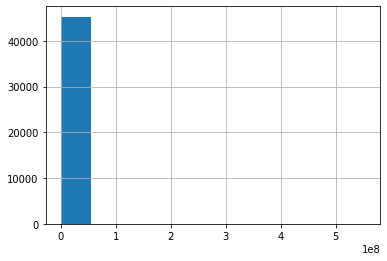

In [11]:
bpp_original.price.hist()

In [12]:
# Does not look reasonable; need to check data
bpp = (
    bpp_original.loc[bpp_original["sale_online"].isnull()]
    .loc[bpp_original["price"].notnull()]
    .loc[bpp_original["price_online"].notnull()]
    .loc[bpp_original["PRICETYPE"] == "Regular Price"]
)



In [13]:
# Create new df with variables of interest
bpp.filter(["price", "price_online", "p_diff"]).describe()

,price,price_online,p_diff
count,8.169000e+03,8169.00000,8.169000e+03
mean,7.650828e+03,133.36461,-7.517463e+03
std,6.641562e+05,495.47564,6.641574e+05
min,2.500000e-01,0.25000,-6.002112e+07
25%,5.990000e+00,5.99000,-1.000000e-01
50%,1.499000e+01,14.99000,0.000000e+00
75%,4.399000e+01,44.95000,0.000000e+00
max,6.002113e+07,6362.00000,9.200100e+02


In [14]:
# Drop obvious mistakes: prices > 1000. 
bpp = bpp.loc[bpp["price"] < 1000] # Is this really a mistake?

Text(0, 0.5, 'Count')

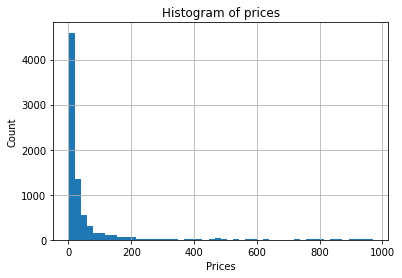

In [15]:
# Plot again
bpp.price.hist(bins=50) # Play with number of bins
plt.title("Histogram of prices")
plt.xlabel("Prices")
plt.ylabel("Count")

Text(0.5, 0, 'Prices')

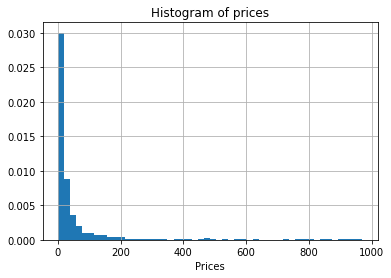

In [16]:
# Relative frequency
bpp.price.hist(bins=50, density=True) # Play with number of bins
plt.title("Histogram of prices")
plt.xlabel("Prices")

## Task 2
Create histogram and density plots for price differences!

Text(0.5, 0, 'Prices (online)')

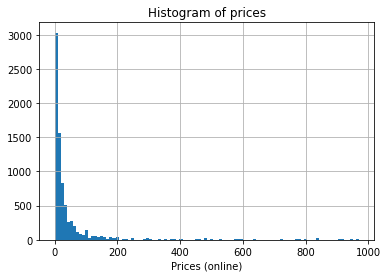

In [20]:
# Histogram
bpp.price_online.hist(bins=100) # Play with number of bins
plt.title("Histogram of prices")
plt.xlabel("Prices (online)")

Text(0.5, 0, 'Prices (online)')

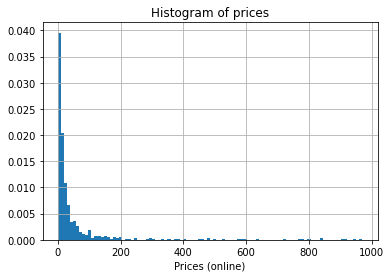

In [24]:
# Histogram
bpp.price_online.hist(bins=100, density=True) # Play with number of bins
plt.title("Histogram of prices")
plt.xlabel("Prices (online)")

In [25]:
from scipy import stats

In [26]:
stats.ttest_1samp(bpp["p_diff"], 0)

TtestResult(statistic=-1.3135807936650183, pvalue=0.18902550071796193, df=7892)

In [27]:
stats.ttest_1samp(bpp["p_diff"], 0, alternative="greater")

TtestResult(statistic=-1.3135807936650183, pvalue=0.905487249641019, df=7892)

In [28]:
stats.ttest_1samp(bpp["p_diff"], 0, alternative="less")

TtestResult(statistic=-1.3135807936650183, pvalue=0.09451275035898096, df=7892)

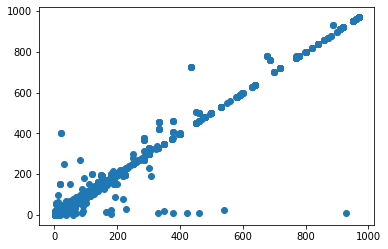

In [30]:
# Association between variables
x = bpp.price_online.to_numpy()
y = bpp.price.to_numpy()

plt.scatter(x, y)

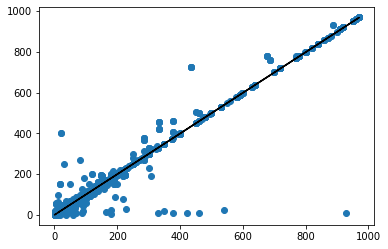

In [32]:
x = bpp.price_online.to_numpy()
y = bpp.price.to_numpy()

plt.scatter(x, y)


m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='k')


In [33]:
# Correlation and covariance


bpp.filter(["price", "price_online"]).cov()



,price,price_online
price,18352.002061,17993.494181
price_online,17993.494181,18040.666718


In [34]:
bpp.filter(["price", "price_online"]).corr()

,price,price_online
price,1.000000,0.988889
price_online,0.988889,1.000000


In [36]:
corr_table = (
    bpp.groupby("COUNTRY")["price"]
    .corr(bpp["price_online"])
    .rename("correlation")
    .reset_index()
)

corr_table

,COUNTRY,correlation
0,BRAZIL,0.965225
1,CHINA,0.903165
2,GERMANY,0.444990
3,JAPAN,0.990857
4,SOUTHAFRICA,0.974192
5,USA,0.984573


In [37]:
corr_table2 = (
    bpp.groupby(["year", "COUNTRY"])["price"]
    .corr(bpp["price_online"])
    .rename("correlation")
    .reset_index()
)

corr_table2

,year,COUNTRY,correlation
0,2015.0,BRAZIL,0.813101
1,2015.0,GERMANY,0.177105
2,2015.0,JAPAN,0.867502
3,2015.0,SOUTHAFRICA,0.998470
4,2015.0,USA,0.978825
5,2016.0,BRAZIL,0.999120
6,2016.0,CHINA,0.903165
7,2016.0,GERMANY,0.994315
8,2016.0,JAPAN,0.996807
9,2016.0,SOUTHAFRICA,0.974105
